In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
ic=pd.read_csv('/content/insurance_customer_data.csv')

In [4]:
ic.head()

,Age,Gender,Annual_Income,Number_of_Claims,Total_Claim_Amount,Policy_Type,Marital_Status
0,56,Female,25895,2,2929.18,Home,Single
1,69,Female,39738,5,1928.72,Life,Married
2,46,Male,50746,1,1266.54,Health,Married
3,32,Male,69377,1,1299.47,Health,Single
4,60,Female,68404,3,1597.14,Life,Married


In [6]:
ic.shape

(200, 7)

In [7]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Gender              200 non-null    object 
 2   Annual_Income       200 non-null    int64  
 3   Number_of_Claims    200 non-null    int64  
 4   Total_Claim_Amount  200 non-null    float64
 5   Policy_Type         200 non-null    object 
 6   Marital_Status      200 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [8]:
ic.isnull().sum()

,0
Age,0
Gender,0
Annual_Income,0
Number_of_Claims,0
Total_Claim_Amount,0
Policy_Type,0
Marital_Status,0


In [15]:
a=ic.iloc[:,[2,3]].values

In [16]:
print(a)

[[ 25895      2]
 [ 39738      5]
 [ 50746      1]
 [ 69377      1]
 [ 68404      3]
 [ 74045      2]
 [117888      2]
 [ 59790      1]
 [ 25600      3]
 [114660      3]
 [113179      2]
 [ 60764      1]
 [ 94543      2]
 [ 65714      2]
 [ 76835      1]
 [ 93744      0]
 [ 76491      0]
 [ 38589      5]
 [ 63484      1]
 [102989      0]
 [ 56212      2]
 [ 63525      2]
 [ 67202      3]
 [ 52635      7]
 [ 83208      1]
 [ 53828      2]
 [ 38711      1]
 [ 23420      3]
 [116752      3]
 [ 20301      2]
 [ 65236      1]
 [ 86235      1]
 [ 74240      3]
 [ 85726      3]
 [ 30492      2]
 [ 26102      4]
 [ 70336      1]
 [105314      4]
 [ 46641      1]
 [ 54584      3]
 [ 52745      3]
 [ 43093      1]
 [ 86105      1]
 [ 71885      2]
 [ 56631      1]
 [ 92991      1]
 [ 24014      0]
 [ 31093      1]
 [ 38070      2]
 [ 55777      0]
 [ 76958      4]
 [102074      2]
 [ 30729      4]
 [119713      4]
 [ 65017      0]
 [ 86320      0]
 [ 47751      0]
 [ 98069      0]
 [ 74748      

In [17]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
  kmeans.fit(a)
  wcss.append(kmeans.inertia_)

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
insu=kmeans.fit_predict(a)
print(insu)

[1 1 1 0 0 0 2 0 1 2 2 0 2 0 0 2 0 1 0 2 1 0 0 1 0 1 1 1 2 1 0 0 0 0 1 1 0
 2 1 1 1 1 0 0 1 2 1 1 1 1 0 2 1 2 0 0 1 2 0 1 1 0 0 1 1 1 2 2 2 0 1 2 1 0
 2 2 2 0 1 1 2 1 2 2 0 0 0 1 0 2 0 1 0 0 2 1 0 2 2 1 1 0 2 2 0 0 0 0 1 0 2
 0 2 2 2 1 2 2 2 2 2 2 1 1 2 1 1 1 0 1 2 2 0 2 1 0 1 1 1 0 0 1 1 0 1 1 1 0
 2 2 0 0 1 2 2 2 0 1 0 0 2 0 2 2 0 1 2 0 1 2 2 0 0 0 1 1 2 2 2 0 0 0 1 1 0
 0 1 1 1 1 0 0 1 2 0 2 2 0 0 1]


In [20]:
b=kmeans.fit_predict(a)
ic['cluster']=b

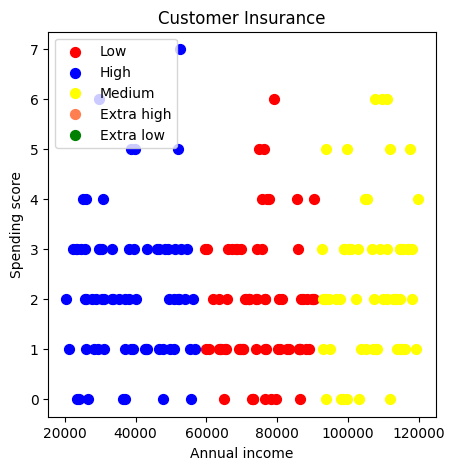

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(a[b==0,0],a[b==0,1],s=50,c='red',label='Low')
plt.scatter(a[b==1,0],a[b==1,1],s=50,c='blue',label='High')
plt.scatter(a[b==2,0],a[b==2,1],s=50,c='yellow',label='Medium')
plt.scatter(a[b==3,0],a[b==3,1],s=50,c='coral',label='Extra high')
plt.scatter(a[b==4,0],a[b==4,1],s=50,c='green',label='Extra low')
plt.title("Customer Insurance")
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

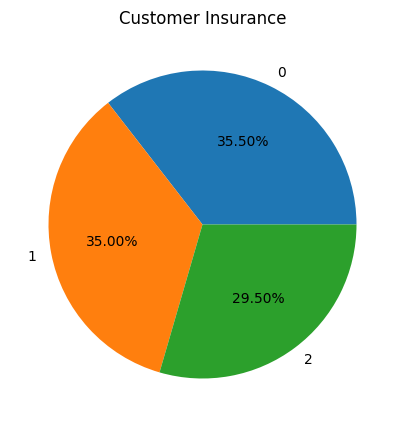

In [24]:
v=pd.Series(insu).value_counts()
plt.figure(figsize=(5,5))
plt.pie(v,labels=v.index,autopct='%1.2f%%')
plt.title('Customer Insurance')
plt.show()

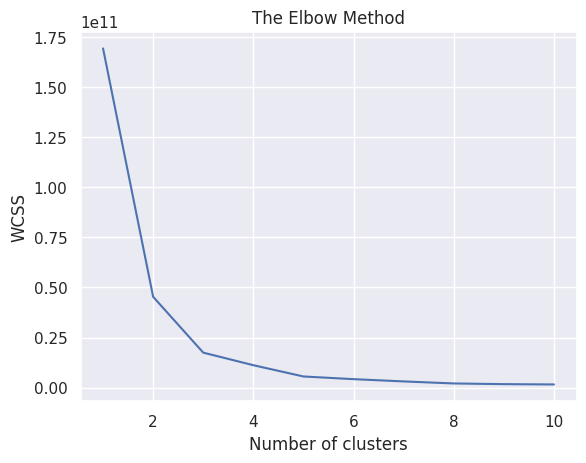

In [25]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()